# DZ 1 Немного EDA для маркетинговых данных

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение. Вам предстоит выявить особенности людей, пользующихся данным приложением и найти интересные закономерности.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Немного важной информации:

1. Обязательно гуглите! Использование дополнительных методов не карается, но приветствуется (если вы сможете объяснить принцип их работы) Однако, если вы нашли что-то полезное и хотите скопировать себе - сделав это, добавьте в начале ячейки ссылку на источник. В противном случае это будет считаться плагиатом.

2. Плагиат не допускается и строго наказывается. Единственное возможное исключение - код, заимствованный из интернета, с ссылкой на источник.

## Задание 1 (1 балл): предобработка данных

Откройте предложенные данные.

In [1]:
import pandas as pd
df = pd.read_csv("marketing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?

В этом датасете представлены 2 типа данных: int64 - вещественное целое число и object (в нашем случае это string)
Давайте взглянем на то как представлены данные в датасете

In [2]:
# Взглянем на первые 10 строк в датасете
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


На первый взгляд, данные чистые и представлены правильно, единственное что признак income представлен в виде строки и признак Dt_customer имеет необычный формат даты

Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)

In [3]:
# Так как данные чистые, пройдемся по строке и заменим $ и , на пустые строки, приведем результирующию строку в float
df['Income'] = df['Income'].replace('[\$, ]', '', regex=True)
df['Income'] = df['Income'].astype(float)

Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.

In [4]:
# Разобьем дату по / и склеим в другом порядке
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x: '20' + x.split('/')[2] + '-' + x.split('/')[0] + '-' + x.split('/')[1] )
# Приведем признак в распознаваемый pandas'ом тип
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x: pd.to_datetime(x))

## Задание 2 (1.5 балла): пропуски и выбросы

Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.

_важно: просто удалить - это не стратегия обработки, придумайте что-то другое_

In [5]:
# Судя по первому вызову df.info(), в наших данных не хватает 24 значений в признаке Income
# Посмотрим на строки с пропущеными значениями
df.iloc[df.loc[df['Income'].isnull()].index]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,...,4,3,0,0,0,0,0,0,0,AUS


In [6]:
# Очевидно что эти значения не могут быть 0, так как этими людьми были совершены покупки
# Одна из самых частых стратегий обработки - заполнение пропуском средним по столбцу
# Так мы не испортим статистики и не потеряем другие данные
df['Income'].fillna(df['Income'].mean(), inplace=True)

Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.

In [7]:
# Посмотрим на статистики датасета, они быстро нам выдадут странные данные
# Последние 8 признаков - бинарные
df1 = df[df.columns[:-8]]
# Выбираем только числовые признаки
temp_df = df1.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
temp_df.describe(datetime_is_numeric=True)
# Большинство значений выглядят хорошо, Однако смущают income, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


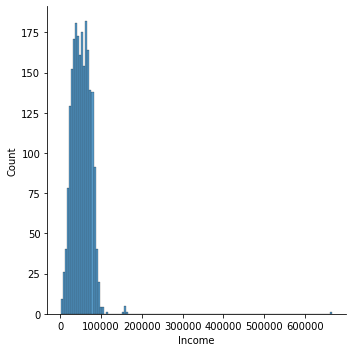

In [8]:
# Построим dist plot
import seaborn as sns
sns.displot(df['Income']);
# Видно что большинство зарплат лежат до 110000
# Удалим все что больше
df = df[df['Income'] < 110000]
# Удалять выбросы в данных очень важно, так как они портят среднее и другие статистики который важны для анализа и ML

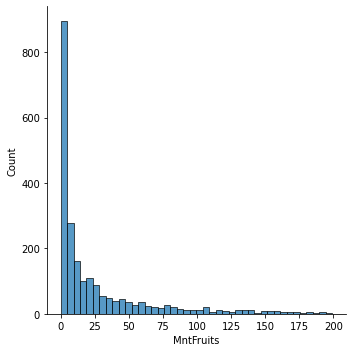

In [9]:
sns.displot(df['MntFruits']);
df = df[df['MntFruits'] < 115]

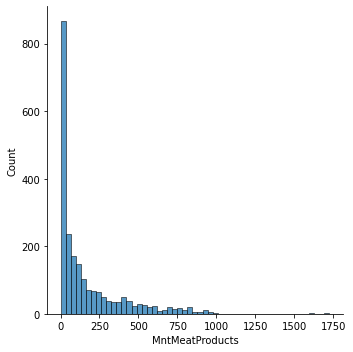

In [10]:
sns.displot(df['MntMeatProducts']);
df = df[df['MntMeatProducts'] < 1000]

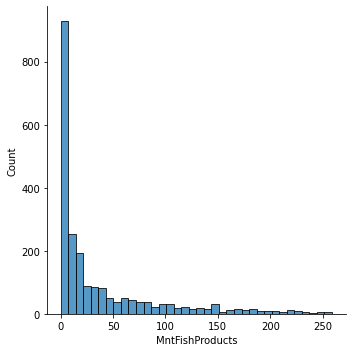

In [11]:
sns.displot(df['MntFishProducts']);
df = df[df['MntFishProducts'] < 160]

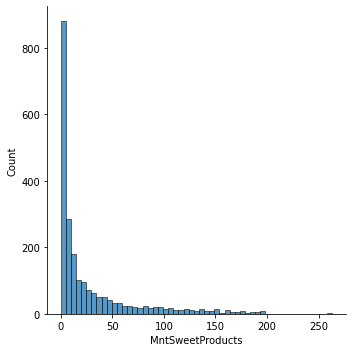

In [12]:
sns.displot(df['MntSweetProducts']);
df = df[df['MntSweetProducts'] < 200]

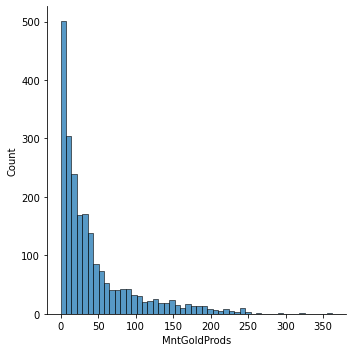

In [13]:
sns.displot(df['MntGoldProds']);
df = df[df['MntGoldProds'] < 250]

## Задание 3 (1 балл): новые признаки

Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.

In [15]:
# Было бы логичным добавить признак с полной суммой денег потраченной клиентом.
# Используя этот новый признак и новый признак с полным количеством покупок можно создать еще один признак 'средний чек'
# Все три признака являются очень важными метриками для бизнеса
import numpy as np
df['TotExpend'] = df['MntFishProducts'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds']
df['TotPurch'] = df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']
df['AvgCheck'] = df['TotExpend']/df['TotPurch']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotExpend,TotPurch,AvgCheck
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,1190,14,85.000000
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,577,17,33.941176
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,251,10,25.100000
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,11,3,3.666667
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,91,6,15.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,US,689,18,38.277778
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,SP,55,4,13.750000
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,SP,309,12,25.750000
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,IND,1383,19,72.789474


## Задание 4 (2.5 балла): время статистики!

Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.

In [16]:
# Этот метод уже использовался выше, взглянем на него еще раз
df.describe()
# Видно что в основном наш датасет покрывает людей 40 лет, с хорошей зарплатой и зачастую уже обоснованными семьями

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,TotExpend,TotPurch,AvgCheck
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,...,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2225.000000
mean,5589.864962,1968.794527,51634.176214,0.444594,0.507851,49.130552,305.323015,26.413638,164.045760,37.689098,...,0.073127,0.074473,0.073127,0.064603,0.013459,0.149843,0.009421,604.757739,12.533872,37.420819
std,3247.830627,11.984279,20547.192634,0.538636,0.544729,28.959399,336.840722,39.837995,214.857292,54.712582,...,0.260403,0.262598,0.260403,0.245879,0.115255,0.356998,0.096627,600.906321,7.168299,30.046312
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2.666667
25%,2826.000000,1959.000000,35441.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,6.000000,13.000000
50%,5462.000000,1970.000000,51563.000000,0.000000,0.000000,49.000000,177.000000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000,12.000000,29.733333
75%,8420.000000,1977.000000,68118.000000,1.000000,1.000000,74.000000,505.000000,33.000000,230.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1043.000000,18.000000,49.050000
max,11191.000000,1996.000000,105471.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,32.000000,187.666667


Выберите 3 интересующих вас количественных признака и рассчитайте релевантные с вашей точки зрения описательные статистики для этих признаков, сгруппировав данные по семейному положению, образованию, стране. Какие закономерности вы можете отметить? Как их можно проинтерпретировать? 

In [17]:
# Я выберу Income, TotPurch и Recency как количественные признаки

df_temp = df[['Income', 'TotPurch', 'Recency', 'Education', 'Marital_Status', 'Country']]
df_temp.groupby(['Education']).mean()
# Видно что количество посещений не особо зависит от образования. 
# Есть очевидная связь между образованием и доходом, хотя 2n Cycle, Graduation, Master и PhD отличаются незначительно между собой
# Также видно позитивную зависимость между доходом и количеством покупок, она более менее очевидна

,Income,TotPurch,Recency
Education,,,
2n Cycle,47678.873776,11.608911,48.396040
Basic,20306.259259,5.222222,48.444444
Graduation,52030.697921,12.669635,50.072128
Master,52624.399070,12.528455,47.615176
PhD,55126.884110,13.430353,48.480249


In [18]:
df_temp.groupby(['Country']).mean()
# Все страны имеют примерно одинаковое распределение зарплат, покупок и посещений
# За исключением ME, где меньше посещений, намного больше покупок и зарплата на уровень выше

,Income,TotPurch,Recency
Country,,,
AUS,51840.276672,12.200000,46.656250
CA,52655.559935,12.947566,46.681648
GER,52927.633378,12.750000,49.400000
IND,48275.136986,11.719178,49.938356
ME,57680.333333,17.333333,26.666667
SA,52699.023881,12.737313,49.617910
SP,51216.122367,12.422548,49.745188
US,52669.257035,13.233645,50.373832


In [19]:
df_temp.groupby(['Marital_Status']).mean()
# Так как нет метаданных о Marital_Status (что такое Absurd, YOLO), тяжело что то говорить об этих результатах

,Income,TotPurch,Recency
Marital_Status,,,
Absurd,72365.500000,17.500000,53.000000
Alone,43789.000000,9.666667,30.333333
Divorced,52396.610390,12.857143,49.350649
Married,51414.675302,12.530233,48.216279
Single,50887.894076,12.081420,49.590814
Together,51616.056536,12.533913,50.269565
Widow,56426.561706,14.363636,49.142857
YOLO,48432.000000,14.000000,3.000000


## Задание 5 (1 балл): корреляции

Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны. 

_важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций_

In [20]:
# """ На самом деле, самые скоррелированые признаки это Income и Income, Country и Country и Recency и Recency. Хехе """
corr_matrix = df.corr()

# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
        
i = 0
for index, value in sol.items():
    print(index, value)
    if i == 2:
        break
    i += 1

# MntWines и TotExpend скорее всего связаны тем что вино составляет большую часть чека
# MntWines и TotExpend скорее всего связаны тем что мясо составляет большую часть чека
# NumStorePurchases и TotPurch связаны тем что большая часть покупок приходится на магазины

('TotExpend', 'AvgCheck') 0.920911845150574
('MntWines', 'TotExpend') 0.8990653963573592
('NumStorePurchases', 'TotPurch') 0.869049850641196


## Задание 6 (2 балла) : визуализации

Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм. 

<AxesSubplot:xlabel='Income', ylabel='Education'>

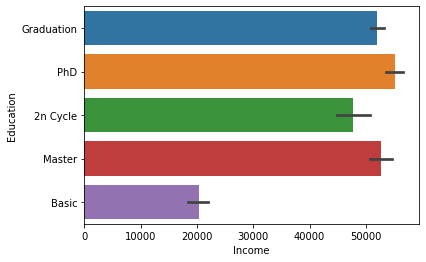

In [21]:
sns.barplot(x="Income", y="Education", data=df)
# Более наглядная связь между образованием и зарплатой

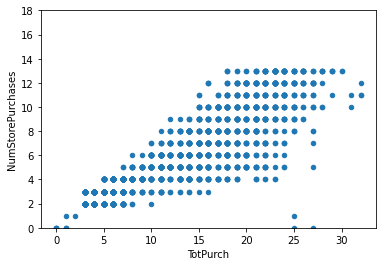

In [22]:
data = pd.concat([df['NumStorePurchases'], df['TotPurch']], axis=1)
data.plot.scatter(x='TotPurch', y='NumStorePurchases', ylim=(0,18));

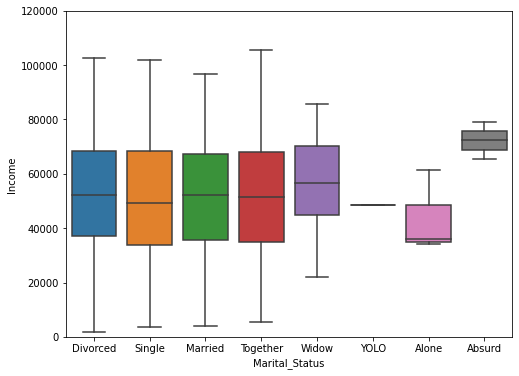

In [23]:
import matplotlib.pyplot as plt
data = pd.concat([df['Income'], df['Marital_Status']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Marital_Status', y="Income", data=data)
fig.axis(ymin=0, ymax=120000);
# По каким то причинам, у вдов самая большая медиана после absurd(что бы это не значило)
# Статус стоит рассмотреть больше

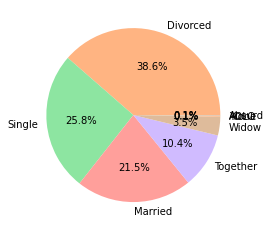

In [24]:
data = df['Marital_Status'].value_counts()
labels = df['Marital_Status'].unique()
colors = sns.color_palette('pastel')[1:6]

plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()
# Распределение семейного положения
# Как видно, вдовы составляют только 3.3% от всех данных
# Так как это некое искажение данных, верить прошлой диаграмме не стоит

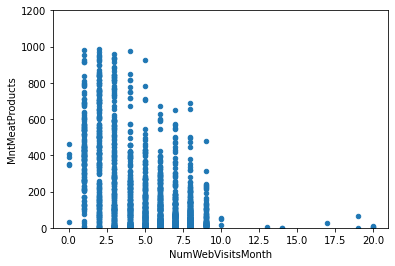

In [25]:
data = pd.concat([df['MntMeatProducts'], df['NumWebVisitsMonth']], axis=1)
data.plot.scatter(x='NumWebVisitsMonth', y='MntMeatProducts', ylim=(0,1200));
# Из этого графика видно что чем больше люди покупают мяса, тем меньше они заходят на веб сайт.
# Скорее всего из-за того что выбирать мясо лучше вживую

<AxesSubplot:xlabel='Complain', ylabel='Income'>

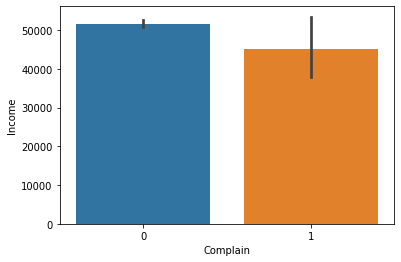

In [26]:
sns.barplot(x="Complain", y="Income", data=df)
# Чем меньше люди зарабатывают, тем больше хотят получить больше за свои деньги, и, скорее всего, из-за этого больше жалуются

## Задание 7 (1 балл): немного исследований

Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

(-0.5, 4.5, 0.0, 2000.0)

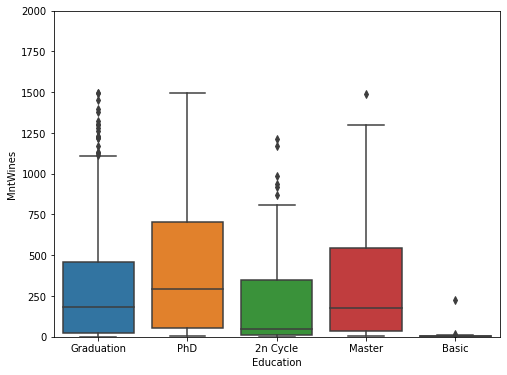

In [27]:
import matplotlib.pyplot as plt
data = pd.concat([df['MntWines'], df['Education']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Education', y="MntWines", data=data)
fig.axis(ymin=0, ymax=2000)
# Удивительно, но чем больше у вас знаний, тем больше вам хочется пить
# Скорее всего имеет связь с большой зарплатой у людей с PhD, они могут позволить себе больше вина